## Полученные результаты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('deepseek_evaluation.csv')

In [3]:
accuracy_datasets = ["cola", "wordcontext", "mathqa", "wnli"]

def choose_deepseek(row):
    if row["task"] in accuracy_datasets:
        return row["accuracy"]
    else:
        return row["f1_macro"]

def choose_chatgpt(row):
    if row["task"] in accuracy_datasets:
        return row["ChatGPT Accuracy (if appl.)"]
    else:
        return row["ChatGPT F1-macro (if appl.)"]

df["deepseek"] = df.apply(choose_deepseek, axis=1)
df["ChatGPT"] = df.apply(choose_chatgpt, axis=1)


In [4]:
semantic_tasks = [
    "wsd", "reading", "tweetstance", "mathqa",
    "squad", "wnli", "textentail", "wordcontext", "cola"
]

def assign_type(task):
    if task in semantic_tasks:
        return "semantic"
    else:
        return "pragmatic"

df['type'] = df['task'].apply(assign_type)


In [11]:
# данные авторов
sota = [
    74.5, 81, 86.4, 98.5, 53.6, 99.4, 74, 92.1, 97.9, 90.8, 83.2, 68, 52.8, 54.5, 66.1, 66.1, 66.1, 51, 70.9, 76.4, 32.2, 72.1, 67.4, 84.7, 83.2
    ]
df["sota"] = sota


In [8]:
def loss_calculate(sota, model):
  return 100 * (sota - model) / sota

In [13]:
df['chat_gpt loss'] = df.apply(lambda x: loss_calculate(x.sota, x.ChatGPT), axis=1)
df['deepseek loss'] = df.apply(lambda x: loss_calculate(x.sota, x.deepseek), axis=1)

In [16]:
df.to_csv('deepseek_evaluation_final.csv')

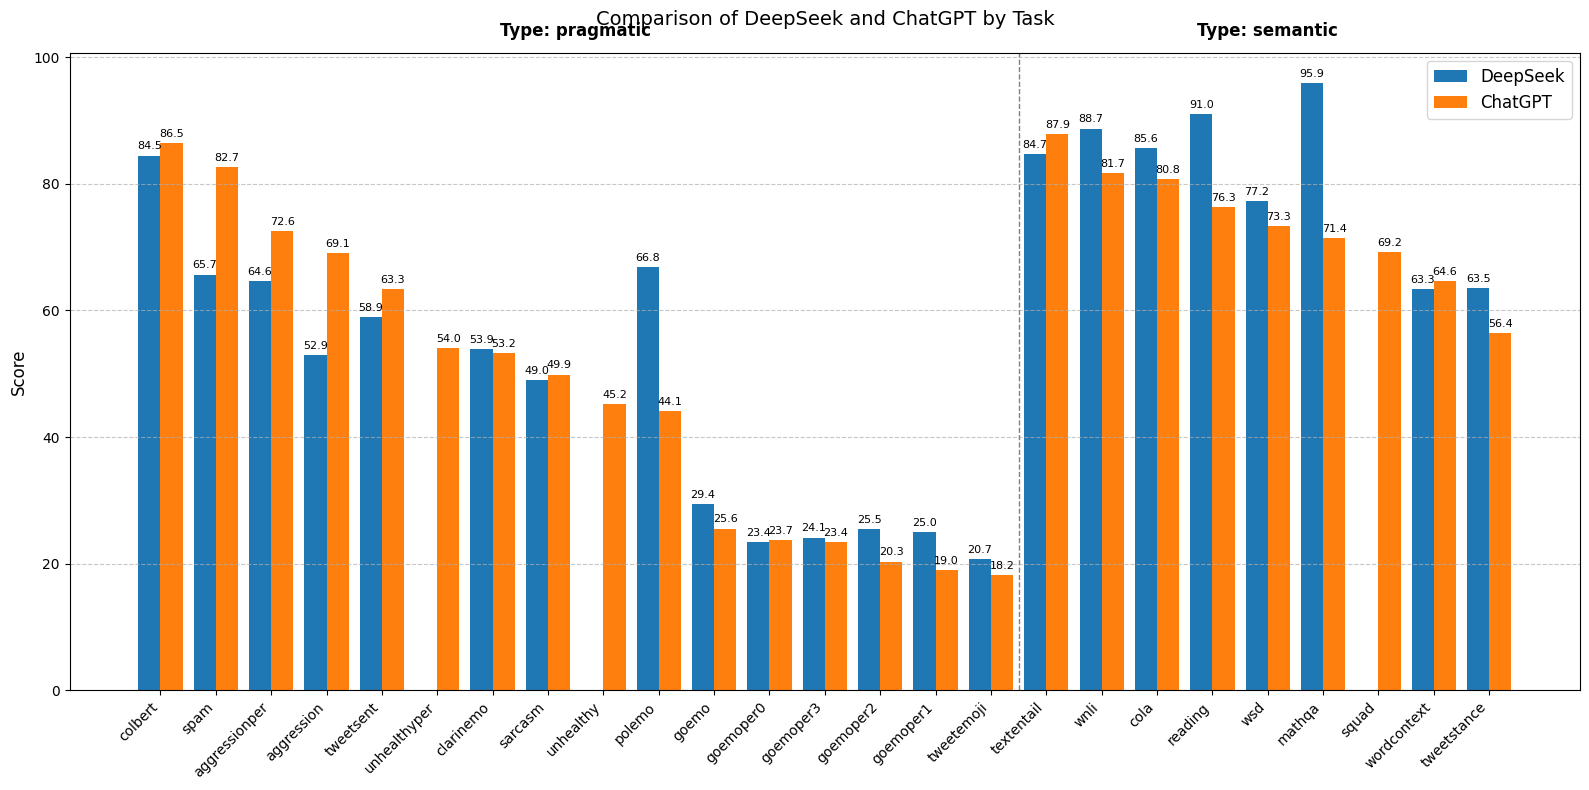

In [5]:
for col in ['deepseek', 'ChatGPT']:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

df_sorted = df.sort_values(by=['type', 'ChatGPT'], ascending=[True, False])

plt.figure(figsize=(16, 8))
ax = plt.gca()

n = len(df_sorted)
x = np.arange(n)
width = 0.4

rects1 = ax.bar(x - width/2, df_sorted['deepseek'], width, label='DeepSeek', color='#1f77b4')
rects2 = ax.bar(x + width/2, df_sorted['ChatGPT'], width, label='ChatGPT', color='#ff7f0e')

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparison of DeepSeek and ChatGPT by Task', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_sorted['task'], rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

types = df_sorted['type'].values
for i in range(1, len(types)):
    if types[i] != types[i-1]:
        ax.axvline(i - 0.5, color='gray', linestyle='--', linewidth=1)

type_positions = []
current_type = types[0]
start_pos = 0
for i, t in enumerate(list(types) + ['']):
    if i == len(types) or t != current_type:
        end_pos = i - 1
        type_positions.append((current_type, (start_pos + end_pos) / 2))
        if i < len(types):
            current_type = t
            start_pos = i

for t, pos in type_positions:
    ax.text(pos, ax.get_ylim()[1] * 1.02, f'Type: {t}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        if height != 0:
            ax.annotate(f'{height:.1f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()

<ipython-input-18-6b2d669d2cc0>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{-y:.1f}" for y in y_ticks])


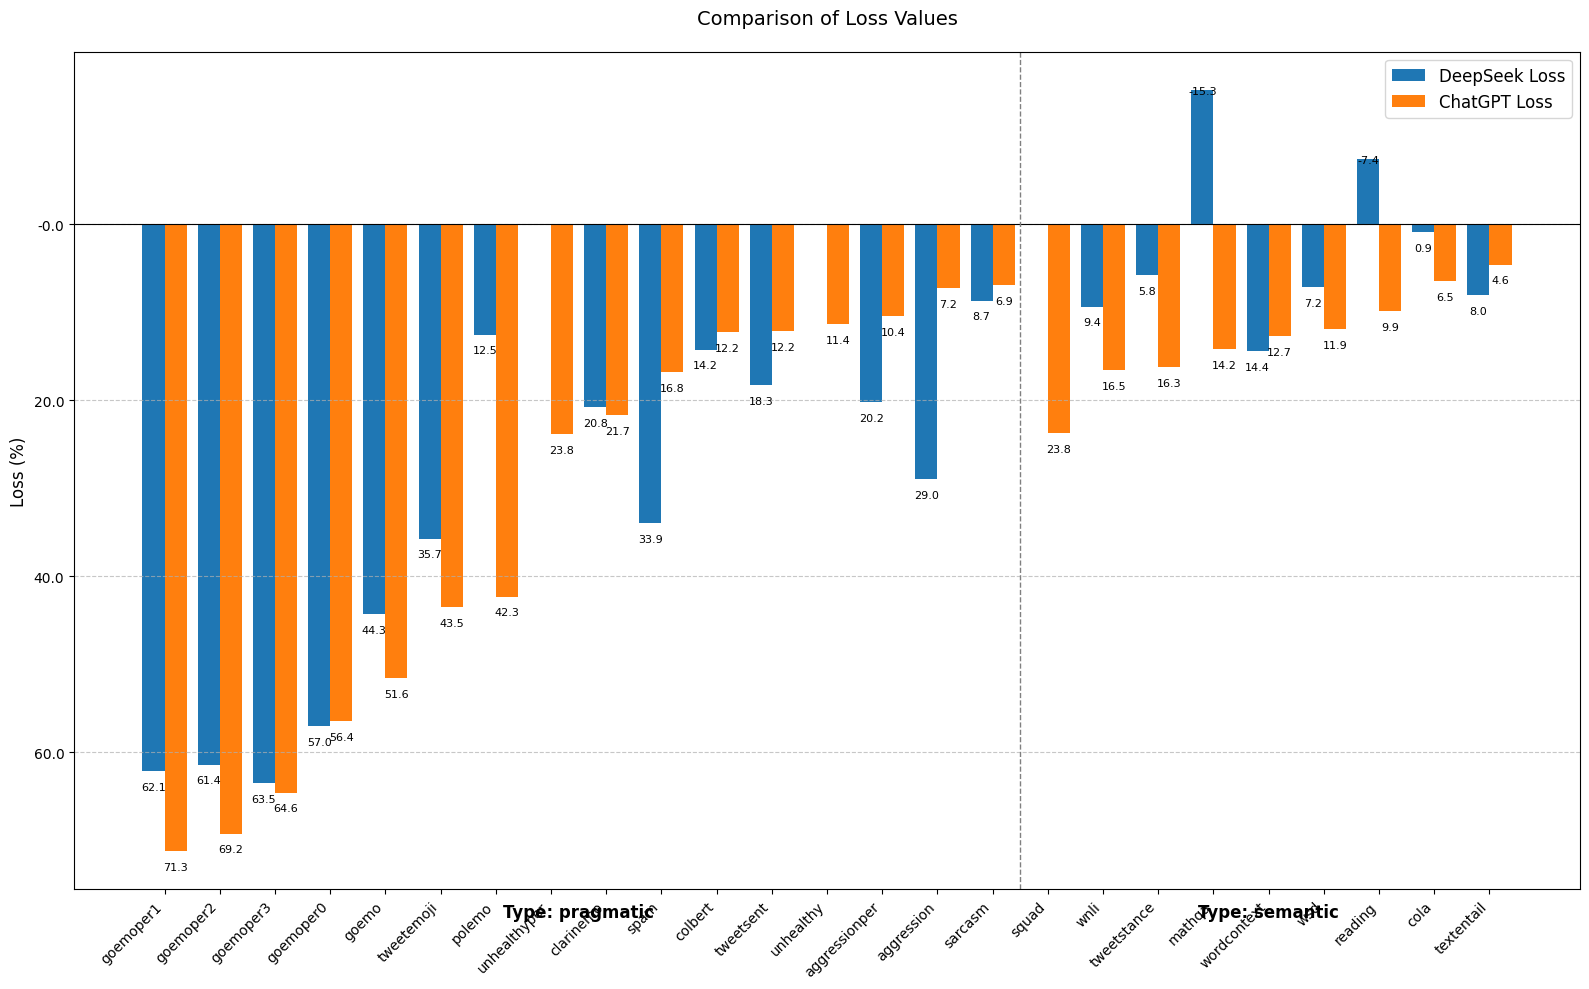

In [18]:
df_sorted = df.sort_values(by=['type', 'chat_gpt loss'], ascending=[True, False])

plt.figure(figsize=(16, 10))
ax = plt.gca()

n = len(df_sorted)
x = np.arange(n)
width = 0.4

deepseek_values = -df_sorted['deepseek loss']
chatgpt_values = -df_sorted['chat_gpt loss']

rects1 = ax.bar(x - width/2, deepseek_values, width, label='DeepSeek Loss', color='#1f77b4')
rects2 = ax.bar(x + width/2, chatgpt_values, width, label='ChatGPT Loss', color='#ff7f0e')

ax.set_ylabel('Loss (%)', fontsize=12)
ax.set_title('Comparison of Loss Values', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_sorted['task'], rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

y_ticks = ax.get_yticks()
ax.set_yticklabels([f"{-y:.1f}" for y in y_ticks])

ax.axhline(y=0, color='black', linewidth=0.8)

types = df_sorted['type'].values
for i in range(1, len(types)):
    if types[i] != types[i-1]:
        ax.axvline(i - 0.5, color='gray', linestyle='--', linewidth=1)

type_positions = []
current_type = types[0]
start_pos = 0
for i, t in enumerate(list(types) + ['']):
    if i == len(types) or t != current_type:
        end_pos = i - 1
        type_positions.append((current_type, (start_pos + end_pos) / 2))
        if i < len(types):
            current_type = t
            start_pos = i

for t, pos in type_positions:
    ax.text(pos, ax.get_ylim()[0] * 1.02, f'Type: {t}',
            ha='center', va='top', fontsize=12, fontweight='bold')


def add_labels(rects, original_values):
    for rect, val in zip(rects, original_values):
        height = rect.get_height()
        if val != 0:
            ax.annotate(f'{val:.1f}',
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, -15 if height < 0 else 3),
                       textcoords="offset points",
                       ha='center', va='bottom' if height < 0 else 'top', fontsize=8)

add_labels(rects1, df_sorted['deepseek loss'])
add_labels(rects2, df_sorted['chat_gpt loss'])

plt.tight_layout()
plt.show()

In [19]:
df

,task,dataset_size,accuracy,f1_macro,ChatGPT Accuracy (if appl.),ChatGPT F1-macro (if appl.),accuracy_gpt4,f1_macro_gpt4,accuracy_gpt3_5,f1_macro_gpt3_5,deepseek,ChatGPT,type,sota,chat_gpt loss,deepseek loss
0,aggression,1000,57.57,52.90,"77,9","69,1",NaN,NaN,NaN,NaN,52.90,69.10,pragmatic,74.5,7.248322,28.993289
1,aggressionper,1000,68.64,64.60,"79,6","72,57",NaN,NaN,NaN,NaN,64.60,72.57,pragmatic,81.0,10.407407,20.246914
2,cola,1042,85.59,82.93,"80,8","78,11",NaN,NaN,NaN,NaN,85.59,80.80,semantic,86.4,6.481481,0.937500
3,colbert,1000,84.50,84.47,"86,5","86,47",NaN,NaN,NaN,NaN,84.47,86.47,pragmatic,98.5,12.213198,14.243655
4,sarcasm,1000,48.95,48.95,50,"49,88",NaN,NaN,NaN,NaN,48.95,49.88,pragmatic,53.6,6.940299,8.675373
5,spam,1115,73.36,65.66,"89,8","82,67",NaN,NaN,NaN,NaN,65.66,82.67,pragmatic,99.4,16.830986,33.943662
6,wordcontext,638,63.32,59.92,"64,58","63,45",NaN,NaN,NaN,NaN,63.32,64.58,semantic,74.0,12.729730,14.432432
7,textentail,277,85.20,84.70,"88,09","87,88",90.61,90.49,NaN,NaN,84.70,87.88,semantic,92.1,4.581976,8.034745
8,wnli,71,88.73,88.62,"81,7","81,63",87.32,87.07,61.97,59.36,88.73,81.70,semantic,97.9,16.547497,9.366701
9,squad,1000,NaN,NaN,"56,5","69,21",NaN,NaN,NaN,NaN,NaN,69.21,semantic,90.8,23.777533,NaN
